In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import postprocessing_utils as post
import utils.plotting_utils.plots as plots

In [2]:
def make_plot(task, short_model_name, metric, fit_reg=False, exclude_reg=[]):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.transfer_loss()
    df.loc[:, ["Within-Score", "Cross-Score", "Transfer-Loss"]] *= 100

    plots.scatter(x="Within-Score", 
                  y="Cross-Score",
                  data=df,
                  kind="relplot",
                  style="Test-Group",
                  xaxis_title="In-language Score",
                  yaxis_title="Cross-Language Score",
                  title=(task + " " + short_model_name).upper(),
                  remove_labels=True,
                  alpha=0.75)

    leg = plt.gca().get_legend()
    leg.texts[0].set_text("Train Group")
    leg.texts[5].set_text("Test Group")
    
    df = df[~df["Train-Language"].isin(exclude_reg)] # Exclude langs

    print(pearsonr(x=df["Within-Score"], y=df["Cross-Score"]))

    if fit_reg:
        x = df["Within-Score"].values
        y = df["Cross-Score"].values

        m, b = np. polyfit(x, y, 1)
        x = np.arange(x.min(), x.max(), 1)
        plt.plot(x, m*x + b, "gray")

# PoS

In [3]:
task = "pos"
metric = "Accuracy"

(0.04572969280445609, 0.42540102769485916)


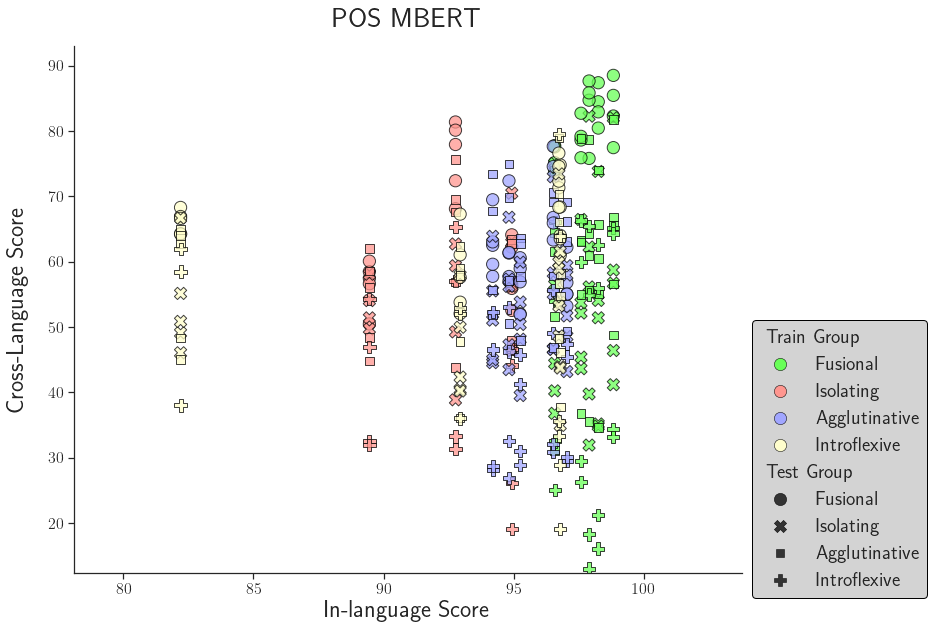

In [4]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/within_vs_cross_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

(0.05242034714922513, 0.36079191876007916)


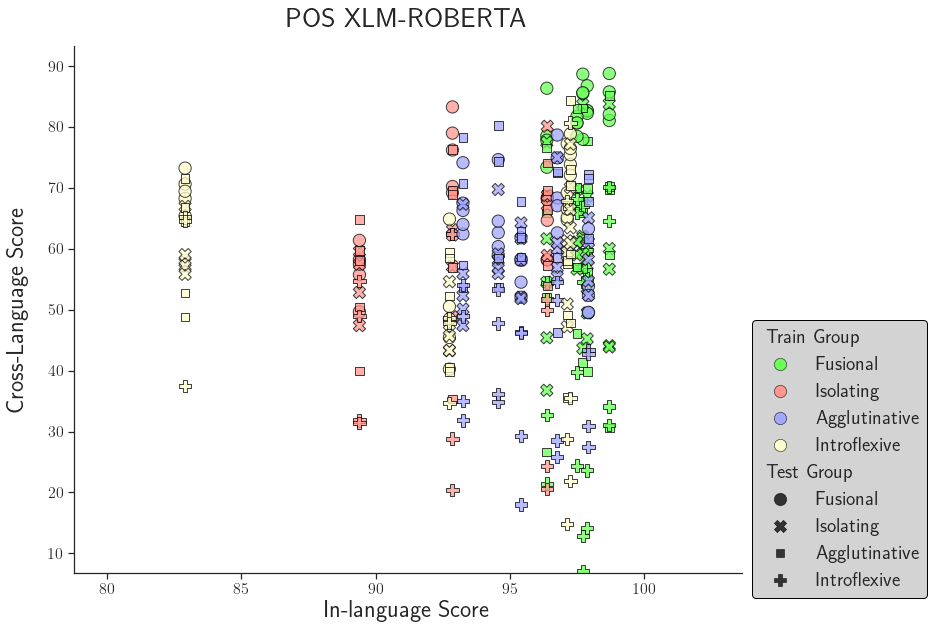

In [5]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/within_vs_cross_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

# Sentiment

In [44]:
task = "sentiment"
metric = "Macro_F1"

(0.006015983399414494, 0.914098690188569)


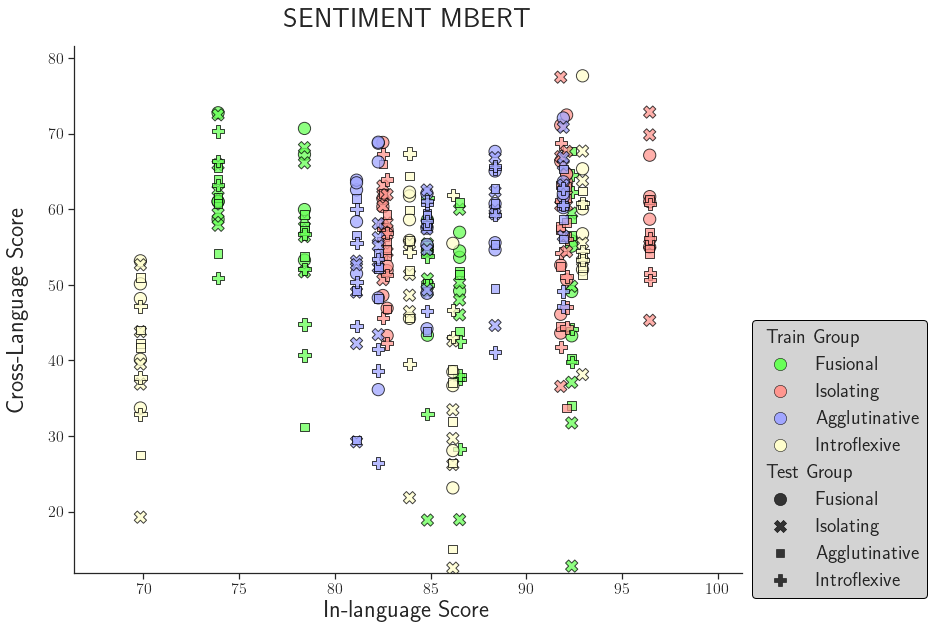

In [46]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=False, exclude_reg=["Maltese"])
plt.savefig("../../../results/acl/{}/plots/within_vs_cross_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

(0.01980066067626464, 0.7225377396708079)


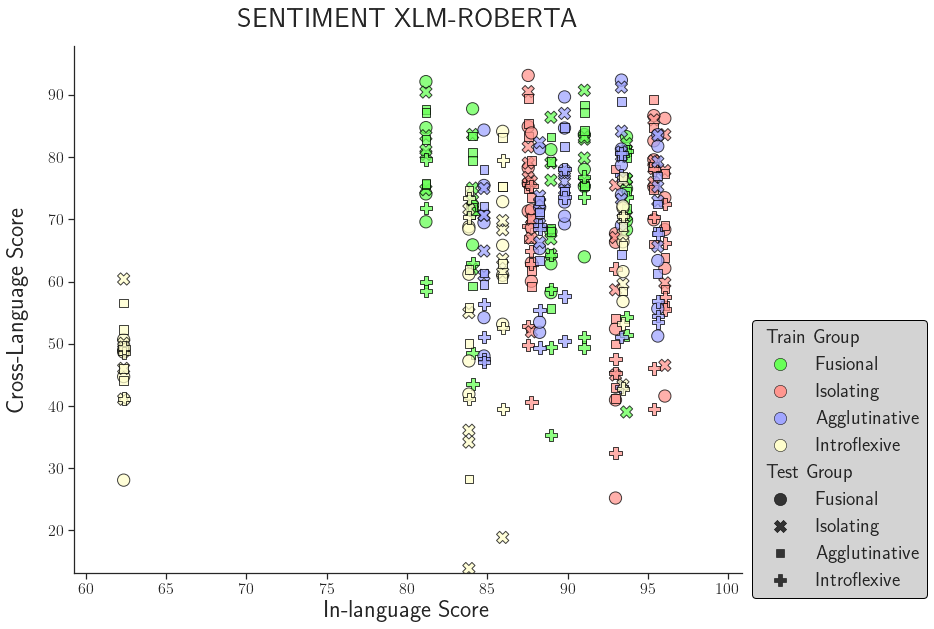

In [48]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric, exclude_reg=["Maltese"])
plt.savefig("../../../results/acl/{}/plots/within_vs_cross_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")